Deep learning algorithms fail to work well if we have only one training example.

One-shot learning is a classification or object categorization task in which one or a few examples are used to classify many new examples.

The principle behind one-shot learning is Humans learn new concepts with very little supervision.

### Problem in COnvNet

- A small training set is really not enough to train a robust neural network for this task. The feature vectors trained do not contain important information that can be used for the recognition of future images.
- Retraining the ConvNet every time the number of classes or dataset is increased is way too time and resource consuming.

### Solutions to one-shot learning

#### 1. Siamese network for one-shot learning

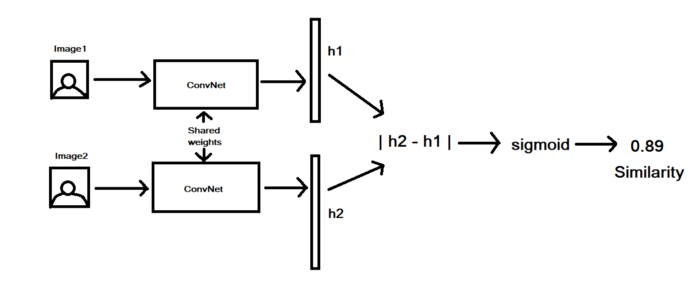

#### Siamese networks are based on a similarity function, which does not require extensive training

#### Takes input two images—one being the actual image and other the candidate image—and outputs the similarity between the two.

The two input images, if very similar, output = lower value

The two input images, if not similar, output = Higher value

degree of difference between the two images is compared with the threshold value(𝜏) (which is a hyperparameter), 

if degree of difference between 2 image < threshold -> output = same person

if degree of difference between 2 image > threshold -> output = different person


#### Both the images to be compared are passed through the same networks, called sister networks, having the same parameters and shared weights.

images are passed through a sequence of convolutional, pooling, and fully connected layers, and end up with a feature vector of a fixed size, say, 128 denoted by f(x1) as an encoding of the input image x1.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')
import os
import numpy as np
from numpy import genfromtxt

import tensorflow as tf
import PIL

from tensorflow.keras.models import model_from_json


In [3]:
json_file = open('faceNet/model.json', 'r')
print('json_file : \n',json_file)
loaded_model_json = json_file.read()
print('loaded_model_json : \n',loaded_model_json)
json_file.close()

json_file : 
 <_io.TextIOWrapper name='faceNet/model.json' mode='r' encoding='cp1252'>
loaded_model_json : 
 {"class_name": "Functional", "config": {"name": "inception_resnet_v1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 160, 160, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Conv2D", "config": {"name": "Conv2d_1a_3x3", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [2, 2], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "linear", "use_bias": false, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_con

In [4]:
model = model_from_json(loaded_model_json)
print('model: \n',model)
model.load_weights('faceNet/model.h5')
print('model weights: \n',model.load_weights('faceNet/model.h5'))


ValueError: bad marshal data (unknown type code)

In [9]:
# detecting the multiple faces in the image
# detectMultiScale - Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles
faces = faceClassifier.detectMultiScale(grayImage)
# print(faces) display the detected images x axis, y axis and image width and height
# print("\nNo. of Faces Found :",len(faces)) # printing the No of faces detected using detectMultiScale

In [12]:
#saving every face which is detected in previous steps
for (x, y, w, h) in faces:
    # drawing a rectangle on any image 
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # roi - region of intreset using slicing the y and x axis along with height and width 
    roi_color = image[y:y + h, x:x + w]
    # saving the croped image
    cv2.imwrite('./images/'+str(w) + str(h) + '_faces.jpg', roi_color)

# saving the detected image
cv2.imwrite('detected_faces.jpg', image)

True

## Croping and saving the detected faces by using the face classifier


In [13]:
def face_scrap(imagePath):
    #imagePath contains the image from which the face needs to be extracted
    image = cv2.imread(imagePath)
    # print(image.shape) -> result -> (194, 259, 3)
    # plt.imshow(image) # displaying the image

    # converting the image into gray scale image
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # print(gray.shape) -> result -> (194, 259)
    # plt.imshow(gray) # displaying the image
    
    # using haarcascade_frontalface_default.xml for classfing(detection) the face 
    faceClassifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    # print(faceClassfier)
    
    # detecting the multiple faces in the image
    # detectMultiScale - Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles
    faces = faceClassifier.detectMultiScale(grayImage)
    # print(faces) display the detected images x axis, y axis and image width and height
    # print("\nNo. of Faces Found :",len(faces)) # printing the No of faces detected using detectMultiScale
    
    #saving every face which is detected in previous steps
    for (x, y, w, h) in faces:
        # drawing a rectangle on any image 
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # roi - region of intreset using slicing the y and x axis along with height and width 
        roi_image = image[y:y + h, x:x + w]
        # saving the croped image
        cv2.imwrite('./images/'+str(w) + str(h) + '_faces.jpg', roi_image)

    # saving the detected image
    cv2.imwrite('detected_faces.jpg', image)

In [14]:
imagePath = './faceDetect.jpg'
face_scrap(imagePath)

### face embedding

FaceNet is a model that, when given a picture of a face, will extract high-quality features from it and predict a 128-element vector representation of these features, called a face embedding. ace embeddings can then be used as the basis for training classifier systems on standard face recognition benchmark datasets.

# Loading FaceNet

### Triplet loss integration

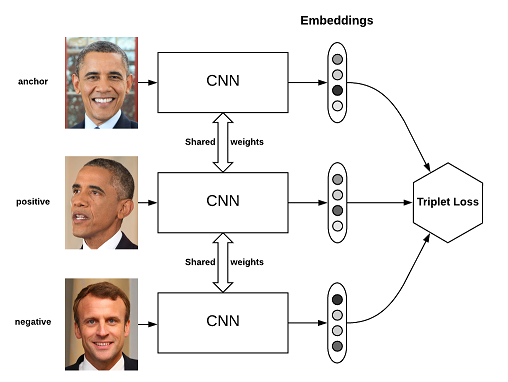

#### compare pairs of images and learn the parameters of the neural network accordingly

one “anchor” image and get the distance between it and the “positive” (matching) image

distance of the anchor image with a “negative” (non-matching) example

Triplet loss is a loss function for machine learning algorithms where a baseline (anchor) input is compared to a positive (truthy) input and a negative (falsy) input.

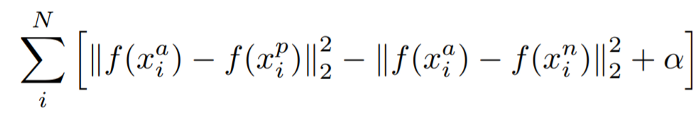

In [ ]:
### Contrastive loss for dimensionality reduction

#### Dimensionality reduction involves reducing the dimensions of the feature vector. 

If the classes are the same,  loss function encourages  -> output = feature vectors that are similar

If the classes are the different,  loss function encourages  -> output = feature vectors that are less similar
